- Name : Eman Ramadan Diab


- Id : 191001


In [1]:
import numpy as np 
import pandas as pd 
from sklearn.utils import shuffle


In [2]:
data = pd.read_csv("Telecom-Usage-Details.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Task1

# using naive baye's classifier

1- Apply Naive Bayes classifier with Cross Validation to build another model for churn prediction.

Use feature engineering to create at least 3 calculated features out of the variables provided in the dataset. 

Use the experience gained from Assignment #1. (Code: 15 points - Explanation: 15 points)



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
data.dropna(inplace = True)

In [6]:
data.drop(['customerID'],axis = 1,inplace= True)

In [7]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [9]:
for col in data.columns :
    if col == 'TotalCharges': 
        data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
    elif data[col].dtype == 'object':
        data[col] = pd.get_dummies(data[[col]], dummy_na=False)

In [10]:
data_ =  pd.get_dummies(data)

In [11]:
data_ = data_.dropna()
data_ = shuffle(data_)


In [12]:
X = data_.iloc[:,[x for x in range(0,19)]].values
y = data_.iloc[:,19].values

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [14]:
from sklearn.naive_bayes import GaussianNB
gnb1 = GaussianNB()
gnb1.fit(x_train, y_train)
y_pred = gnb1.predict(x_test)
score = gnb1.score(x_test,y_test)
print("\n simple naive baye's without any modifications \n")
print("The score of naive bay's is :  " + str(score))


# ====

from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb1, X, y, cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# ===== 

print("\n the score after using shuffle split and cross validation \n ")
from sklearn.model_selection import ShuffleSplit

n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

print(cross_val_score(gnb1, X, y, cv=cv))

# =====

print("\n the score after using prepreocssing with standarization \n ")

from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
gnb_ = gnb1.fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
print(gnb_.score(X_test_transformed, y_test))


# =====
print("\n the score after using pipeline \n ")

from sklearn.pipeline import make_pipeline
_gnb_ = make_pipeline(preprocessing.StandardScaler(), gnb1)
print(cross_val_score(_gnb_, X, y, cv=cv))




 simple naive baye's without any modifications 

The score of naive bay's is :  0.7497630331753554
Accuracy: 0.75 (+/- 0.01)

 the score after using shuffle split and cross validation 
 
[0.7507109  0.75165877 0.74218009 0.75781991 0.74123223]

 the score after using prepreocssing with standarization 
 
0.7518663348738002

 the score after using pipeline 
 
[0.7521327  0.75165877 0.74218009 0.75687204 0.74312796]


# use feature Engineering 


i noticed that we have columns which are so related to churn/no churn 
so i though what if we bring them together in new column 



OnlineSecurity,OnlineBackup, DeviceProtection ,TechSupport

In [15]:
def new_column(row):
    if row['OnlineSecurity'] == 1 and row['OnlineBackup'] ==1 and row['DeviceProtection']==1  and row['TechSupport'] ==1 :
        return int(1)
    else:
        return int(0)

In [16]:
data['new_feature'] = data.apply(lambda row: new_column(row), axis=1)

In [17]:
churn_col = data['Churn'].copy()

In [18]:
data.drop(['Churn'],axis=1,inplace = True)

In [19]:
data['Churn'] = churn_col

In [20]:
data_ = data.copy()
data_

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,new_feature,Churn
0,1,0,0,1,1,1,0,1,1,0,...,1,1,1,1,0,0,29.85,29.85,0,1
1,0,0,1,1,34,0,1,1,0,1,...,1,1,1,0,1,0,56.95,1889.50,0,1
2,0,0,1,1,2,0,1,1,0,0,...,1,1,1,1,0,0,53.85,108.15,0,0
3,0,0,1,1,45,1,0,1,0,1,...,0,1,1,0,1,1,42.30,1840.75,0,1
4,1,0,1,1,2,0,1,0,1,1,...,1,1,1,1,0,0,70.70,151.65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,24,0,0,1,0,1,...,0,0,0,0,0,0,84.80,1990.50,0,1
7039,1,0,0,0,72,0,0,0,1,0,...,1,0,0,0,0,0,103.20,7362.90,0,1
7040,1,0,0,0,11,1,0,1,0,1,...,1,1,1,1,0,0,29.60,346.45,0,1
7041,0,1,0,1,4,0,0,0,1,1,...,1,1,1,1,0,0,74.40,306.60,1,0


In [21]:
# OnlineSecurity,OnlineBackup, DeviceProtection ,TechSupport
data.corr()['Churn']

gender             -0.008612
SeniorCitizen      -0.150889
Partner            -0.150448
Dependents         -0.164221
tenure              0.352229
PhoneService        0.011942
MultipleLines       0.032569
InternetService     0.124214
OnlineSecurity     -0.342637
OnlineBackup       -0.268005
DeviceProtection   -0.252481
TechSupport        -0.337281
StreamingTV        -0.128916
StreamingMovies    -0.130845
Contract           -0.405103
PaperlessBilling    0.191825
PaymentMethod       0.117937
MonthlyCharges     -0.193356
TotalCharges        0.199484
new_feature        -0.319630
Churn               1.000000
Name: Churn, dtype: float64

In [22]:
"""data.drop(['PhoneService'],axis =1 ,inplace = True )
data.drop(['gender'],axis =1 ,inplace = True )
data.drop(['MultipleLines'],axis =1 ,inplace = True )"""

"data.drop(['PhoneService'],axis =1 ,inplace = True )\ndata.drop(['gender'],axis =1 ,inplace = True )\ndata.drop(['MultipleLines'],axis =1 ,inplace = True )"

In [23]:
data = shuffle(data)


In [24]:
X = data.dropna().iloc[:,[x for x in range(0,20)]].values
y = data.dropna().iloc[:,20].values

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
gnb2 = GaussianNB()
gnb2.fit(x_train, y_train)
y_pred = gnb2.predict(x_test)
score = gnb2.score(x_test,y_test)
print("\n simple naive baye's without any modifications \n")
print("The score of naive bay's is :  " + str(score))
scores = cross_val_score(gnb2, X, y, cv=100)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



 simple naive baye's without any modifications 

The score of naive bay's is :  0.7417061611374408
Accuracy: 0.75 (+/- 0.09)


awesome looks like the new feature improve the model by 0.1 in average :D


we have multiple un related feature may be if we combine them it would give better results!


In [26]:
data_.corr()['Churn']

gender             -0.008612
SeniorCitizen      -0.150889
Partner            -0.150448
Dependents         -0.164221
tenure              0.352229
PhoneService        0.011942
MultipleLines       0.032569
InternetService     0.124214
OnlineSecurity     -0.342637
OnlineBackup       -0.268005
DeviceProtection   -0.252481
TechSupport        -0.337281
StreamingTV        -0.128916
StreamingMovies    -0.130845
Contract           -0.405103
PaperlessBilling    0.191825
PaymentMethod       0.117937
MonthlyCharges     -0.193356
TotalCharges        0.199484
new_feature        -0.319630
Churn               1.000000
Name: Churn, dtype: float64

So looks like PhoneService and  MultipleLines don't occur together so we can remove one of them  Multiple lines is more related as correlation to churn is 0.032569 while the correlation to churn in PhoneService is 0.011942  so we would keep the first one.





In [27]:
#data_.drop(['PhoneService','new_feature2'],axis =1 ,inplace = True)

In [28]:
data_ = shuffle(data_)


In [29]:
data_ 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,new_feature,Churn
2643,1,0,1,1,33,0,0,0,1,1,...,1,1,0,1,0,0,83.35,2757.85,1,0
3607,1,0,1,1,13,0,1,1,0,1,...,0,1,1,0,1,0,55.15,742.90,0,1
6154,1,0,0,0,72,0,0,0,1,0,...,0,0,0,0,0,1,109.20,7711.45,0,1
2332,1,0,0,1,47,0,1,1,0,1,...,1,0,1,0,0,0,66.05,3021.45,0,1
88,1,0,0,0,46,0,1,0,0,0,...,0,0,0,0,0,0,19.95,927.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,0,1,1,1,45,0,1,1,0,1,...,1,1,0,0,1,0,62.70,2791.50,0,0
5401,0,0,1,1,31,0,1,0,0,0,...,0,0,0,0,1,0,20.45,638.55,0,1
3847,0,0,1,1,10,0,1,0,0,0,...,0,0,0,1,0,0,20.00,198.60,0,1
2316,0,0,1,1,4,0,1,0,0,0,...,0,0,0,1,1,0,20.70,73.05,0,1


In [30]:


X = data_.dropna().iloc[:,[x for x in range(0,20)]].values
y = data_.dropna().iloc[:,20].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
gnb3 = GaussianNB()
gnb3.fit(x_train, y_train)
y_pred = gnb3.predict(x_test)
score = gnb3.score(x_test,y_test)
print("\n simple naive baye's without any modifications \n")
print("The score of naive bay's is :  " + str(score))
scores = cross_val_score(gnb3, X, y, cv=100)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



 simple naive baye's without any modifications 

The score of naive bay's is :  0.7393364928909952
Accuracy: 0.75 (+/- 0.10)


In [31]:
data_.corr()['Churn']

gender             -0.008612
SeniorCitizen      -0.150889
Partner            -0.150448
Dependents         -0.164221
tenure              0.352229
PhoneService        0.011942
MultipleLines       0.032569
InternetService     0.124214
OnlineSecurity     -0.342637
OnlineBackup       -0.268005
DeviceProtection   -0.252481
TechSupport        -0.337281
StreamingTV        -0.128916
StreamingMovies    -0.130845
Contract           -0.405103
PaperlessBilling    0.191825
PaymentMethod       0.117937
MonthlyCharges     -0.193356
TotalCharges        0.199484
new_feature        -0.319630
Churn               1.000000
Name: Churn, dtype: float64

<p>
<br> Senior and Partner almost have the same correlation with the churn let's combine them to se whether it would get any better 
</p>    

In [32]:
def sen_d_part(row):
    if row['SeniorCitizen'] == 1 or row['Partner']==1 :
        return int(1)
    else:
        return int(0)

In [33]:
data_

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,new_feature,Churn
2643,1,0,1,1,33,0,0,0,1,1,...,1,1,0,1,0,0,83.35,2757.85,1,0
3607,1,0,1,1,13,0,1,1,0,1,...,0,1,1,0,1,0,55.15,742.90,0,1
6154,1,0,0,0,72,0,0,0,1,0,...,0,0,0,0,0,1,109.20,7711.45,0,1
2332,1,0,0,1,47,0,1,1,0,1,...,1,0,1,0,0,0,66.05,3021.45,0,1
88,1,0,0,0,46,0,1,0,0,0,...,0,0,0,0,0,0,19.95,927.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,0,1,1,1,45,0,1,1,0,1,...,1,1,0,0,1,0,62.70,2791.50,0,0
5401,0,0,1,1,31,0,1,0,0,0,...,0,0,0,0,1,0,20.45,638.55,0,1
3847,0,0,1,1,10,0,1,0,0,0,...,0,0,0,1,0,0,20.00,198.60,0,1
2316,0,0,1,1,4,0,1,0,0,0,...,0,0,0,1,1,0,20.70,73.05,0,1


In [34]:
data_['sen_D_part'] = data_.apply(lambda row: sen_d_part(row), axis=1)

/Users/macbook55/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
data_.corr()['Churn']

gender             -0.008612
SeniorCitizen      -0.150889
Partner            -0.150448
Dependents         -0.164221
tenure              0.352229
PhoneService        0.011942
MultipleLines       0.032569
InternetService     0.124214
OnlineSecurity     -0.342637
OnlineBackup       -0.268005
DeviceProtection   -0.252481
TechSupport        -0.337281
StreamingTV        -0.128916
StreamingMovies    -0.130845
Contract           -0.405103
PaperlessBilling    0.191825
PaymentMethod       0.117937
MonthlyCharges     -0.193356
TotalCharges        0.199484
new_feature        -0.319630
Churn               1.000000
sen_D_part         -0.183492
Name: Churn, dtype: float64

In [36]:
#_data_.drop(['gender','SeniorCitizen','Partner','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'],axis =1, inplace = True)

In [37]:
data_.drop(['Churn'],axis=1,inplace = True)

data_['Churn'] = churn_col
data_

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,new_feature,sen_D_part,Churn
2643,1,0,1,1,33,0,0,0,1,1,...,1,0,1,0,0,83.35,2757.85,1,1,0
3607,1,0,1,1,13,0,1,1,0,1,...,1,1,0,1,0,55.15,742.90,0,1,1
6154,1,0,0,0,72,0,0,0,1,0,...,0,0,0,0,1,109.20,7711.45,0,0,1
2332,1,0,0,1,47,0,1,1,0,1,...,0,1,0,0,0,66.05,3021.45,0,0,1
88,1,0,0,0,46,0,1,0,0,0,...,0,0,0,0,0,19.95,927.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,0,1,1,1,45,0,1,1,0,1,...,1,0,0,1,0,62.70,2791.50,0,1,0
5401,0,0,1,1,31,0,1,0,0,0,...,0,0,0,1,0,20.45,638.55,0,1,1
3847,0,0,1,1,10,0,1,0,0,0,...,0,0,1,0,0,20.00,198.60,0,1,1
2316,0,0,1,1,4,0,1,0,0,0,...,0,0,1,1,0,20.70,73.05,0,1,1


In [38]:
data_.corr()['Churn']

gender             -0.008612
SeniorCitizen      -0.150889
Partner            -0.150448
Dependents         -0.164221
tenure              0.352229
PhoneService        0.011942
MultipleLines       0.032569
InternetService     0.124214
OnlineSecurity     -0.342637
OnlineBackup       -0.268005
DeviceProtection   -0.252481
TechSupport        -0.337281
StreamingTV        -0.128916
StreamingMovies    -0.130845
Contract           -0.405103
PaperlessBilling    0.191825
PaymentMethod       0.117937
MonthlyCharges     -0.193356
TotalCharges        0.199484
new_feature        -0.319630
sen_D_part         -0.183492
Churn               1.000000
Name: Churn, dtype: float64

In [39]:
data_ = shuffle(data_)
data_

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,new_feature,sen_D_part,Churn
5498,1,1,0,1,1,0,1,1,1,1,...,1,1,1,1,0,46.00,46.00,1,1,0
4357,1,0,0,1,15,0,1,0,0,0,...,0,0,1,1,0,20.45,330.80,0,0,1
1454,0,0,0,0,29,0,1,0,0,0,...,0,0,1,0,0,20.65,654.85,0,0,1
6527,0,0,0,0,6,0,1,1,1,0,...,1,1,1,0,0,55.30,324.25,0,0,0
2674,1,1,1,1,4,0,1,0,0,0,...,0,0,1,1,0,20.05,91.45,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5148,0,0,0,1,65,0,0,0,0,0,...,0,1,0,0,0,99.35,6347.55,0,0,1
2968,0,0,1,1,3,0,1,0,1,0,...,1,0,1,1,0,90.40,268.45,0,1,1
2516,1,1,1,1,16,0,0,0,1,1,...,0,0,1,0,0,96.40,1581.20,1,1,0
1805,0,0,0,0,72,0,0,1,0,0,...,1,1,0,1,0,64.45,4720.00,0,0,1


In [40]:
X = data_.dropna().iloc[:,[x for x in range(0,21)]].values
y = data_.dropna().iloc[:,21].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
gnb4 = GaussianNB()
gnb4.fit(x_train, y_train)
y_pred = gnb4.predict(x_test)
score = gnb4.score(x_test,y_test)
print("\n simple naive baye's without any modifications \n")
print("The score of naive bay's is :  " + str(score))
scores = cross_val_score(gnb4, X, y, cv=100)
#print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



 simple naive baye's without any modifications 

The score of naive bay's is :  0.7535545023696683
Accuracy: 0.75 (+/- 0.09)


In [41]:
data_.corr()['Churn']

gender             -0.008612
SeniorCitizen      -0.150889
Partner            -0.150448
Dependents         -0.164221
tenure              0.352229
PhoneService        0.011942
MultipleLines       0.032569
InternetService     0.124214
OnlineSecurity     -0.342637
OnlineBackup       -0.268005
DeviceProtection   -0.252481
TechSupport        -0.337281
StreamingTV        -0.128916
StreamingMovies    -0.130845
Contract           -0.405103
PaperlessBilling    0.191825
PaymentMethod       0.117937
MonthlyCharges     -0.193356
TotalCharges        0.199484
new_feature        -0.319630
sen_D_part         -0.183492
Churn               1.000000
Name: Churn, dtype: float64

In [42]:
data_

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,new_feature,sen_D_part,Churn
5498,1,1,0,1,1,0,1,1,1,1,...,1,1,1,1,0,46.00,46.00,1,1,0
4357,1,0,0,1,15,0,1,0,0,0,...,0,0,1,1,0,20.45,330.80,0,0,1
1454,0,0,0,0,29,0,1,0,0,0,...,0,0,1,0,0,20.65,654.85,0,0,1
6527,0,0,0,0,6,0,1,1,1,0,...,1,1,1,0,0,55.30,324.25,0,0,0
2674,1,1,1,1,4,0,1,0,0,0,...,0,0,1,1,0,20.05,91.45,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5148,0,0,0,1,65,0,0,0,0,0,...,0,1,0,0,0,99.35,6347.55,0,0,1
2968,0,0,1,1,3,0,1,0,1,0,...,1,0,1,1,0,90.40,268.45,0,1,1
2516,1,1,1,1,16,0,0,0,1,1,...,0,0,1,0,0,96.40,1581.20,1,1,0
1805,0,0,0,0,72,0,0,1,0,0,...,1,1,0,1,0,64.45,4720.00,0,0,1


In [43]:
def num_month(row):
    return row['TotalCharges']/row['MonthlyCharges']

In [44]:
data_['num_months'] = data_.apply(lambda row: num_month(row), axis=1)

/Users/macbook55/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
#_data_.drop(['MonthlyCharges'],axis=1,inplace = True)
data_.drop(['Churn'],axis=1,inplace = True)
data_['Churn'] = churn_col

In [46]:
data_ = shuffle(data_)


In [47]:

X = data_.dropna().iloc[:,[x for x in range(0,22)]].values
y = data_.dropna().iloc[:,22].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
gnb5 = GaussianNB()

gnb5.fit(x_train, y_train)

y_pred = gnb5.predict(x_test)
score = gnb5.score(x_test,y_test)
print("\n simple naive baye's without any modifications \n")
print("The score of naive bay's is :  " + str(score))
scores = cross_val_score(gnb5, X, y, cv=100)
#print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



 simple naive baye's without any modifications 

The score of naive bay's is :  0.7464454976303317
Accuracy: 0.75 (+/- 0.10)


# So looks like after all feature engineering i did i don't get so much results hope you can give me a comment about the reason 

# Task 2 

2- Compare developed model with the best model developed in Assignment 



1.Use the confusion matrix and ROC/AUC to discuss the performance of both the new Naive Bayes model with the best Logistic Regression model.



(Code: 10 points - Explanation: 10 points)



/Users/macbook55/.pyenv/versions/3.7.5/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/macbook55/.pyenv/versions/3.7.5/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

The score is 
0.7791469194312797
The accuracy is 
0.7791469194312797
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.827


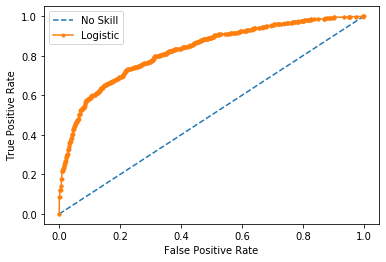

In [48]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from itertools import cycle
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
from random import randrange


data_ = shuffle(data_)
X = data_.dropna().iloc[:,[x for x in range(1,22)]].values
y = data_.dropna().iloc[:,22].values
random = randrange(50)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=random)
clf = LogisticRegression(random_state=10).fit(trainX, trainy)
y_score = clf.score(testX,testy)
print('The score is ')
print(y_score)
y_pred = clf.predict(testX)
acc = accuracy_score(testy, y_pred)
print('The accuracy is ')
print(acc)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Confusion matrix, without normalization Logistic Regression
[[ 421  148]
 [ 387 1154]]
Normalized confusion matrix Logistic Regression
[[0.73989455 0.26010545]
 [0.25113563 0.74886437]]


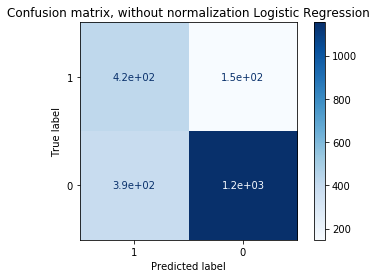

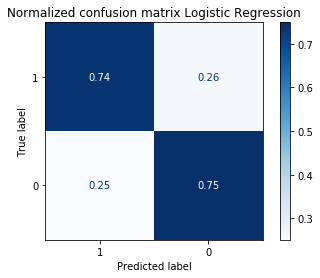

recall Logistic  0.6968196721311475
precision Logistic  0.734353040382273
f1 score Logistic  0.7097024099843051


In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization Logistic Regression", None),
                  ("Normalized confusion matrix Logistic Regression", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(gnb5, x_test, y_test,
                                 display_labels=[1,0],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


from sklearn.metrics import recall_score
print("recall Logistic " , recall_score(testy, y_pred, average='macro'))
from sklearn.metrics import precision_score
print("precision Logistic " , precision_score(testy, y_pred, average='macro'))
from sklearn.metrics import f1_score
print("f1 score Logistic " ,f1_score(testy, y_pred, average='macro'))


In [50]:
from sklearn.metrics import recall_score
print("recall logistic " , recall_score(testy, y_pred, average='macro'))
from sklearn.metrics import precision_score
print("precision logistic " , precision_score(testy, y_pred, average='macro'))
from sklearn.metrics import f1_score
print("f1 score logistic " ,f1_score(testy, y_pred, average='macro'))


recall logistic  0.6968196721311475
precision logistic  0.734353040382273
f1 score logistic  0.7097024099843051


In [51]:
data_

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,new_feature,sen_D_part,num_months,Churn
3339,1,0,0,0,68,0,0,1,0,0,...,0,0,1,0,88.00,6161.90,0,0,70.021591,1
1320,0,0,0,0,32,0,1,0,0,0,...,0,0,1,0,94.80,3131.55,0,0,33.033228,1
2993,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,20.40,20.40,0,0,1.000000,1
6217,0,0,0,0,62,0,1,0,0,0,...,1,0,0,0,81.45,4983.05,0,0,61.179251,1
6869,1,0,0,0,45,0,1,1,1,0,...,1,0,0,0,54.15,2319.80,0,0,42.840259,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,1,1,1,1,14,1,0,1,1,1,...,0,1,0,0,46.35,672.70,1,1,14.513484,1
179,0,0,0,1,61,0,1,0,0,0,...,0,0,0,0,20.55,1252.00,0,0,60.924574,1
6939,0,0,1,1,35,0,1,0,0,1,...,0,0,0,0,89.20,3251.30,0,1,36.449552,1
1197,0,0,0,1,15,0,1,0,0,0,...,0,1,0,0,19.45,340.85,0,0,17.524422,1


The score is 
0.7459715639810427
The accuracy is 
0.7459715639810427
No Skill: ROC AUC=0.500
naive bayes: ROC AUC=0.810


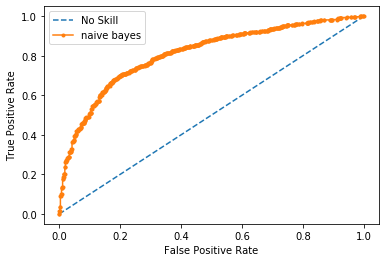

In [52]:
data_ = shuffle(data_)
X = data_.dropna().iloc[:,[x for x in range(1,22)]].values
y = data_.dropna().iloc[:,22].values
random = randrange(50)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=random)
gnb = GaussianNB().fit(trainX, trainy)
y_score = gnb.score(testX,testy)
print('The score is ')
print(y_score)
y_pred = gnb.predict(testX)
acc = accuracy_score(testy, y_pred)
print('The accuracy is ')
print(acc)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = GaussianNB()
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('naive bayes: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='naive bayes')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Confusion matrix, without normalization Naive Baye's
[[ 389  161]
 [ 375 1185]]
Normalized confusion matrix Naive Baye's 
[[0.70727273 0.29272727]
 [0.24038462 0.75961538]]


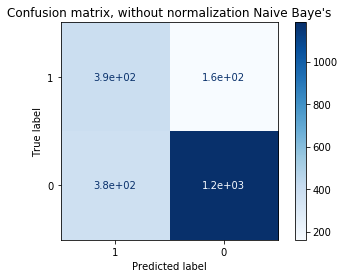

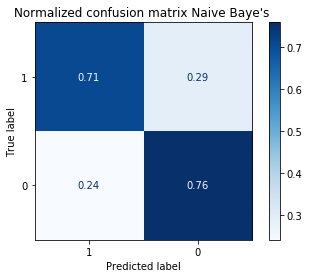

recall Naive Baye's  0.7334440559440559
precision Naive Baye's  0.694774316765596
f1 score Naive Baye's  0.7038196310368199


In [53]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization Naive Baye's", None),
                  ("Normalized confusion matrix Naive Baye's ", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, testX, testy,
                                 display_labels=[1,0],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


print("recall Naive Baye's " , recall_score(testy, y_pred, average='macro'))
print("precision Naive Baye's " , precision_score(testy, y_pred, average='macro'))
print("f1 score Naive Baye's " ,f1_score(testy, y_pred, average='macro'))


# To summerize it these are the results we have from both models




| comparison field | logistic  | Naive |
| --- | --- | --- |
| precision | 0.7343 | 0.7021 |
| accuracy | 0.796 | 0.758 |
| recall | 0.696 | 0.73519 |
| f1 | 0.7097 | 0.7121|
|AUC | 0.828 | 0.814|


- We notice that Logistic model is better in precision and accuray 


which means if you have an application that you do care about false positive results you should probably use logistic 
like cancer you can not say to some one you have cancer then say sorry you don't it is a cruel thing to do.


- while recall and f1 score are higher in naive baye's classifier

which means if you care so much about false negative you should probably use naive baye's classifier like corona virus you can not afford to test some one with positive corona as negative as this one can lead to disaster if we won't quartine on him/her.

- looks like after all logistic is better in predicting  0s as 0s and 1s as 1s  as we can see from AUC numbers but not with a higher difference so we should probably don't count on it so much